# Ground Water Velocity

To calculate, Ground Water Velocity one of the most simple approximation that can be used is the Darcy's Law to by incorporating the parameters K, i, and A. Will enable you to model and analyze the flow of groundwater in a simplified yet effective manner displaying the flow direction and velocity ultimately.

**Darcy's Law** relates the **discharge rate** (_Q_) to measurable properties: **hydraulic conductivity** (_K_) and **hydraulic gradient** (_i_), which is the change in **hydraulic head** (_ΔH_) over a given **distance** (_Δℓ_). Mathematically, this can be expressed as: 

 $$Q = K \cdot i \cdot A$$   
 $$i = \frac{\Delta H}{\Delta \ell}$$
$
$



**Darcy flux** or **specific diescharge** is defined as :
$$q = -\frac{K \cdot \Delta H}{\Delta \ell}$$

Finally **seepage velocity** can be calculated by:
$$v = \frac{q}{n_e}$$

Typically in the process of determining Ground water velocity with the Darcy Law there are Two types of problems 
- 2 Point Porblem 
- 3 Point Problem 

In a 2 Point problem, 2 observation wells are placed, in this type of problem the flow direction is known and using the other parameters such as  _ΔH_, _Δℓ_, _K_, _ne_ the ground water velocity is calculated from the equations listed above the folloiwng figure illustrates the two point problem. 




```{image} two_point_well.png
:height: 300px
:align: center
:name: Two point Problem illustrated
```


In a 3 Point problem, 3 observastion wells are placed, in this the flow direction is not known and using matrix algebra the flow direction and the ground water velocity is calculated. 



```{image} three_point_well.png
:height: 300px
:align: center
:name: Three point Problem illustrated
```



The three point problem is can be solved using a system of linear equationss and matrices. 


```{image} 3point_solution.png
:height: 500px
:align: center
:name: Three point Problem solution
```

Acknowledgements: Devlin, J.F., 2020, Groundwater Velocity. The Groundwater Project, Guelph, Ontario, Canada.a

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Test case for three_point function
x = [2,3, 7]  # x coordinates
y = [3, 7, 3]  # y coordinates
z = [98, 100, 96] # z coordinates
heads = [1, 1, 1]  # Heads at points 1, 2, and 3

 

def two_point(H1,H2,L,ne,K) :
    if H2>H1 :
        dh=H1-H2
    else :
        dh=H2-H1
    
    q=-K*dh/L
    v=q/ne
    print("The Ground Water Velocity is:",v)

def three_point(x,y,z,heads) :
    AT = np.array([x,y,z]) # transpose matrix
    A = np.transpose(AT)   #orignal matrix
    #print(x,y,z,heads)
    ATA = np.dot(AT,A)    #matrix multiplicaion 
    ATA_1 = np.linalg.inv(ATA)   #inverse matrix
    AT_H = np.dot(AT, heads)  # Multiply AT with head
    result_1= np.dot(ATA_1, AT_H)  # matrix multiplication 
    angle = np.arctan(result_1[1] / result_1[0])
    angle_in_degrees = np.degrees(angle)
    # Extract components
    x_component = result_1[0] / result_1[2]
    y_component = result_1[1] / result_1[2]

    # Calculate magnitude
    magnitude = np.sqrt(x_component**2 + y_component**2)

    print("Flow Angle in Radians: ",angle)
    print("Flow and in Degrees",angle_in_degrees)
    print("Flow Velocity",magnitude)
# Append the first point to close the triangle
    x.append(x[0])
    y.append(y[0])

    # Calculate centroid
    centroid_x = np.mean(x[:-1])
    centroid_y = np.mean(y[:-1])

    # Angle in degrees (specify your angle)
    angle_degrees = angle_in_degrees

    # Convert angle to radians
    angle_radians = np.deg2rad(angle_degrees)

    # Length of line (base/4)
    line_length = (x[2] - x[0]) / 4

    # Calculate endpoint of line
    line_endpoint_x = centroid_x + line_length * np.cos(angle_radians)
    line_endpoint_y = centroid_y + line_length * np.sin(angle_radians)

    # Calculate head length (base/16)
    head_length = line_length / 4

    # Plot triangle
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, marker='o')
    plt.fill(x, y, alpha=0.2)

    # Annotate vertices
    for i, txt in enumerate(z):
        plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot centroid
    plt.plot(centroid_x, centroid_y, marker='x', color='red', markersize=10)

    # Draw arrow
    plt.arrow(centroid_x, centroid_y, line_endpoint_x - centroid_x, line_endpoint_y - centroid_y,
            head_width=0.5*head_length, head_length=head_length, fc='blue', ec='blue')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Ground Water Flow direction- 3 Well Problem')
    plt.annotate('Flow Direction',(centroid_x+min(x)/8,centroid_y))
    plt.grid(True)
    plt.show()
#three_point(x, y, z, heads)
    

    


## Enter Data into 

Flow Angle in Radians:  -0.9827937232473253
Flow and in Degrees -56.309932474019995
Flow Velocity 0.7211102550928311


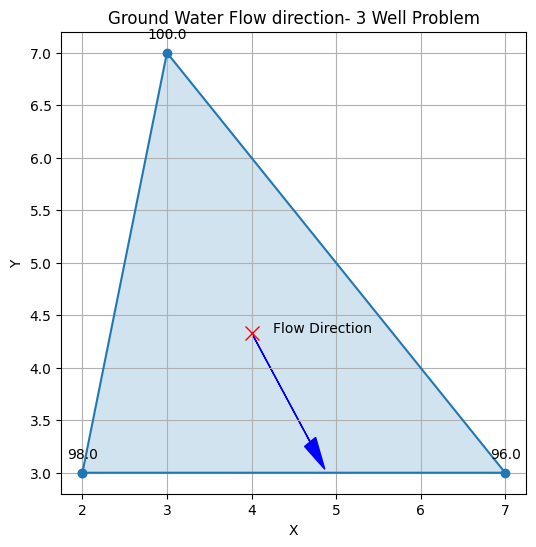

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize empty lists to store coordinates and heads
x1_list = []
y1_list = []
z1_list = []
heads = []

# Function to run when the dropdown selection changes
def on_dropdown_change(change):
    global x1_list, y1_list, z1_list, heads
    x1_list = []
    y1_list = []
    z1_list = []
    heads = []
    
    if change.new == '2 Point Problem':
        #clear_output(wait=True)
        
        head1=widgets.FloatText(value=10, description='Head 1')
        head2=widgets.FloatText(value=20, description='Head 2')
        distance=widgets.FloatText(value=5, description='Distance between Points')
        ne=widgets.FloatText(value=0.6, description='ne')
        K=widgets.FloatText(value=0.001, description='K')
        hbox1 = widgets.HBox([head1, head2])
        hbox2 = widgets.HBox([distance,ne,K])
        vbox = widgets.VBox([hbox1, hbox2])
        display(vbox)
        # Call the two_point function with the stored values
        two_point(head1.value, head2.value, distance.value,ne.value, K.value)
        
    elif change.new == '3 Point Problem':


        # Create nine FloatText widgets
        #print("Well 1 cordinates")
        widget1 = widgets.FloatText(value=2, description='Well 1 X post.')
        widget2 = widgets.FloatText(value=3, description='Well 1 Y post.')
        widget3 = widgets.FloatText(value=98, description='Well 1 Head')
        #print("Well 2 cordinates")
        widget4 = widgets.FloatText(value=3, description='Well 2 X post.')
        widget5 = widgets.FloatText(value=7, description='Well 2 Y post.')
        widget6 = widgets.FloatText(value=100, description='Well 2 Head')
        widget7 = widgets.FloatText(value=7, description='Well 3 X post.')
        widget8 = widgets.FloatText(value=3, description='Well 3 Y post.')
        widget9 = widgets.FloatText(value=96, description='Well 3 Head')

        # Function to be called on widget change
        def on_widget_change(change):
            clear_output(wait=True)
            # Create three HBox layouts to contain the widgets
            hbox1 = widgets.HBox([widget1, widget2, widget3])
            hbox2 = widgets.HBox([widget4, widget5, widget6])
            hbox3 = widgets.HBox([widget7, widget8, widget9])

            # Create a VBox layout to contain the three HBox layouts
            vbox = widgets.VBox([hbox1, hbox2, hbox3])

            # Display the VBox layout
            display(vbox)
            list_x = [widget1.value, widget4.value, widget7.value]
            list_y = [widget2.value, widget5.value, widget8.value]
            list_z = [widget3.value, widget6.value, widget9.value]
            h=[1,1,1]
            three_point(list_x,list_y,list_z,h)


        widget1.observe(on_widget_change, 'value')
        widget2.observe(on_widget_change, 'value')
        widget3.observe(on_widget_change, 'value')
        widget4.observe(on_widget_change, 'value')
        widget5.observe(on_widget_change, 'value')
        widget6.observe(on_widget_change, 'value')
        widget7.observe(on_widget_change, 'value')
        widget8.observe(on_widget_change, 'value')
        widget9.observe(on_widget_change, 'value')
        on_widget_change(None)
            






# Dropdown widget to select between 2 or 3 point problems
dropdown = widgets.Dropdown(options=['Select', '2 Point Problem', '3 Point Problem'], description='Problem Type')

# Register the function to be called when the dropdown value changes
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown
display(dropdown)

